In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [6]:
df1=df.drop(['area_type','availability','society','balcony'],axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3=df1.dropna()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3.shape

(13246, 5)

In [10]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
df3['bhk']=df3['size'].apply(lambda x:int(x.split(' ')[0]))

In [12]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [13]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except ValueError:
        return False
    return True

In [16]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
def convert_to_float(x:str):
    toke=x.split('-')
    if len(toke)==2:
        return((float(toke[0])+float(toke[1]))/2)
    else:
        try:
            return float(x)
        except:
            return None

In [18]:
convert_to_float('2 - 6')

4.0

In [19]:
df4=df3.copy()

In [20]:
df4['total_sqft']=df['total_sqft'].apply(convert_to_float)

In [21]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [22]:
df4.dropna(inplace=True)
df4.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [23]:
df5=df4.copy()

In [24]:
df4['location']=df4['location'].apply(lambda x:x.strip())
df4['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
len(df5['location'].unique())

1298

In [26]:
location_state=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [27]:
less_than_10=location_state[location_state<=10]

In [28]:
df5['location']=df5['location'].apply(lambda x: 'other' if location_state[x]<=10 else x)

In [29]:
len(df5['location'].unique())

241

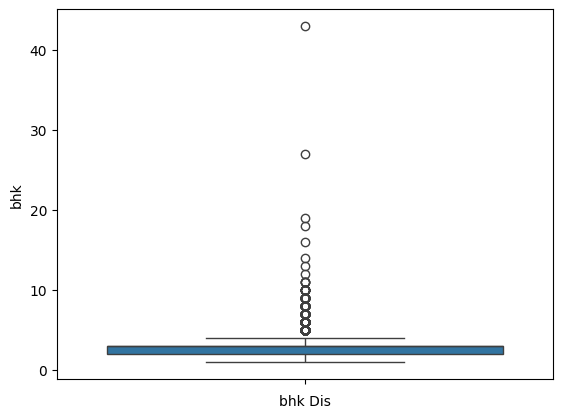

In [30]:
sns.boxplot(data=df5,y='bhk')
plt.xlabel('bhk Dis')
plt.show()

In [31]:
q1=df5['bhk'].quantile(0.25)
q3=df5['bhk'].quantile(0.75)
iqr=q3-q1
l=q1-1.5*iqr
u=q3+1.5*iqr
df5=df5[(df5['bhk']>l)&(df5['bhk']<u)]

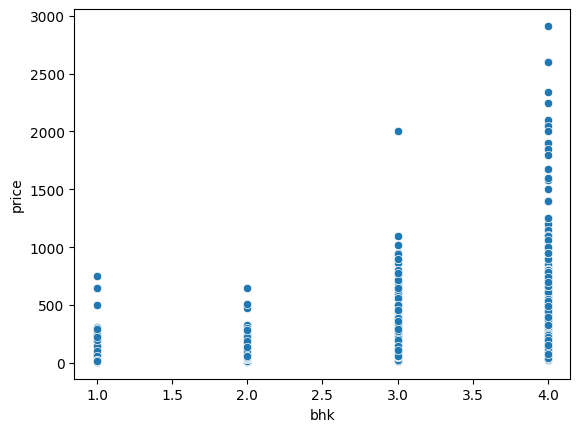

In [32]:
sns.scatterplot(data=df5,x='bhk',y='price')
plt.show()

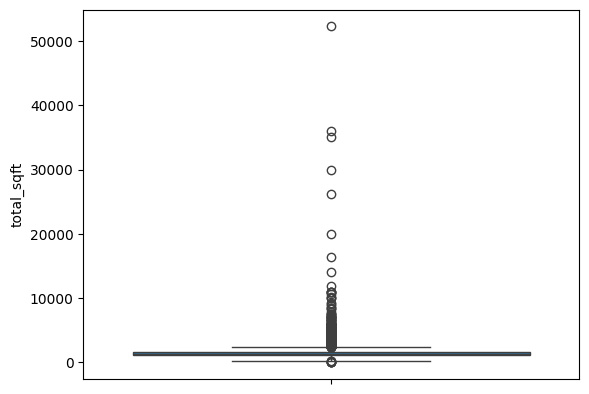

In [33]:
sns.boxplot(data=df5,y='total_sqft')
plt.show()

In [34]:
q1=df5['total_sqft'].quantile(0.25)
q3=df5['total_sqft'].quantile(0.75)
iqr=q3-q1
l=q1-1.5*iqr
u=q3+1.5*iqr
df5=df5[(df5['total_sqft']>=l)&(df5['total_sqft']<=u)]

<Axes: xlabel='total_sqft', ylabel='price'>

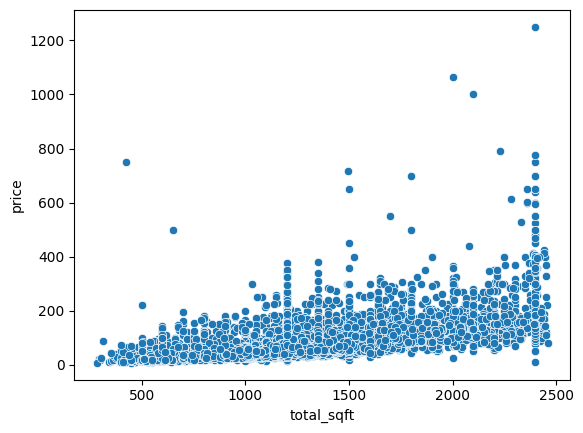

In [35]:
sns.scatterplot(data=df5,x='total_sqft',y='price')

In [36]:
df5.shape

(11353, 6)

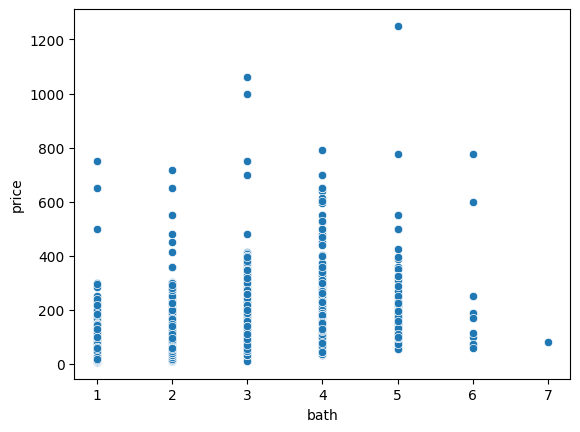

In [37]:
sns.scatterplot(x=df5['bath'],y=df5['price'])
plt.show()

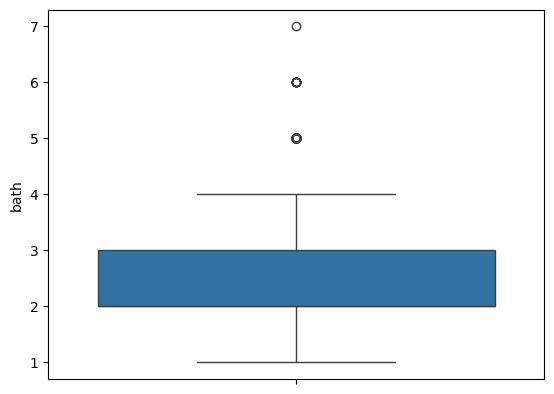

In [38]:
sns.boxplot(y=df5['bath'])
plt.show()

In [39]:
q1=df5['bath'].quantile(0.25)
q3=df5['bath'].quantile(0.75)
iqr=q3-q1
l=q1-1.5*iqr
u=q3+1.5*iqr
df5=df5[(df5['bath']>l)&(df5['bath']<u)]

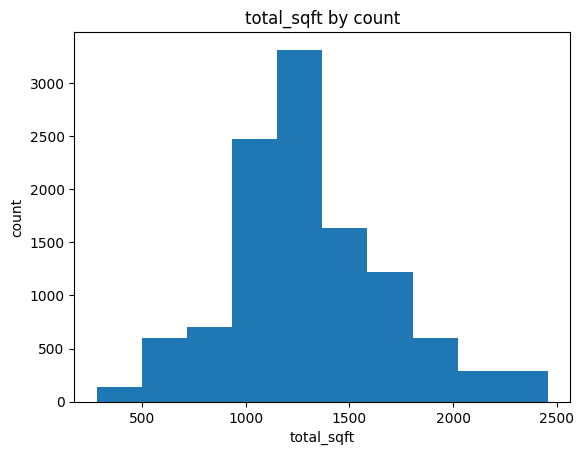

In [40]:
plt.hist(df5['total_sqft'])
plt.xlabel('total_sqft')
plt.ylabel('count')
plt.title('total_sqft by count')
plt.show()

In [41]:
df5.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2


In [42]:
len(df5.location.unique())

241

In [43]:
df6=df5.drop(['size'],axis=1)

In [44]:
df7=df6[df6['location']!='other']
df7.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
5,Whitefield,1170.0,2.0,38.00,2


In [45]:
df8=pd.get_dummies(df7)
df8.head()

,total_sqft,bath,price,bhk,location_ Devarachikkanahalli,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,1056.0,2.0,39.07,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,62.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,95.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,51.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1170.0,2.0,38.00,2,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [92]:
x=df8.drop('price',axis=1)
y=df8[['price']]

In [93]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [94]:
len(x_train.columns)

243

In [95]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)
yhat=lr.predict(x_test)

In [96]:
print('training score= ',lr.score(x_train,y_train))
print('testing score= ',lr.score(x_test,y_test))

training score=  0.6338803200183001
testing score=  0.5785773911351134


In [97]:
from sklearn.metrics import r2_score
print('test score ',r2_score(y_test,yhat))

test score  0.5785773911351134


In [98]:
from sklearn.model_selection import ShuffleSplit ,cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.57082272, 0.55674009, 0.56325231, 0.62857043, 0.62091887])

In [99]:
x.columns

Index(['total_sqft', 'bath', 'bhk', 'location_ Devarachikkanahalli',
       'location_1st Block Jayanagar', 'location_1st Phase JP Nagar',
       'location_2nd Phase Judicial Layout', 'location_2nd Stage Nagarbhavi',
       'location_5th Block Hbr Layout', 'location_5th Phase JP Nagar',
       ...
       'location_Vijayanagar', 'location_Vishveshwarya Layout',
       'location_Vishwapriya Layout', 'location_Vittasandra',
       'location_Whitefield', 'location_Yelachenahalli', 'location_Yelahanka',
       'location_Yelahanka New Town', 'location_Yelenahalli',
       'location_Yeshwanthpur'],
      dtype='object', length=243)

In [100]:
x.head()

,total_sqft,bath,bhk,location_ Devarachikkanahalli,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,...,location_Vijayanagar,location_Vishveshwarya Layout,location_Vishwapriya Layout,location_Vittasandra,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur
0,1056.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1170.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [108]:
def predict_price(location,total_sft,bath,bhk):
    indx_loc=np.where(x.columns==location)[0][0]
    x_p=np.zeros(len(x.columns))
    x_p[0]=total_sft
    x_p[1]=bath
    x_p[2]=bhk
    if indx_loc>=0:
        x_p[indx_loc]=1

    return lr.predict(x_p.reshape(1,-1))[0][0]

In [109]:
predict_price('location_1st Phase JP Nagar',1000.0,2.0,2.0)

104.88789328718309

In [110]:
import pickle
with open('bengaluru_house_prices_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [112]:
import json
columns={
    'data_columns':[i.lower() for i in x.columns]
}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))